In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
df = pd.read_csv("data/scrabble-point-spread.csv")
df.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [12]:
df1 = pd.read_csv("data/scrabble-tournament.csv")
df1.head()

df1['player_id'] = df1['Player ID']

df1.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division,player_id
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1,6003
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1,20749
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1,19535
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1,18474
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1,583


In [32]:
df3 = df.merge(df1, left_on='player_id', right_on='player_id')
df3.head()





,player_id,points_against,points_for,tournament_id,Byes,Credits,Losses,Name,New Rating,Old Rating,...,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,6003,381,443,8163,NaN,NaN,7,Nigel Richards,2196,2168.0,...,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,20749,375,435,8163,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,...,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,19535,391,443,8163,NaN,NaN,8,Will Anderson,2093,2054.0,...,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,18474,386,439,8163,NaN,NaN,9,Noah Walton,2063,2015.0,...,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,583,396,450,8163,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,...,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


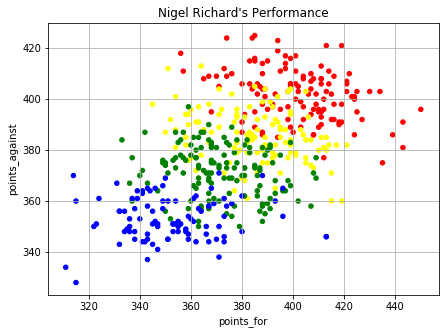

In [42]:
def build_colors(row):
    if row['division'] == 'Division 1':
        return 'red'
    elif row['division'] == 'Division 2':
        return 'yellow'
    elif row['division'] == 'Division 3':
        return 'green'
    elif row['division'] == 'Division 4':
        return 'blue'

colors = df3.reset_index().apply(build_colors, axis=1)

df3.plot(y='points_against', x='points_for', color=colors, kind='scatter', grid=True,
        title="Nigel Richard's Performance", figsize=(7, 5))

plt.savefig("graph_scrabble.pdf")